## How are in-demand skills trending for Data Analysts?
### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

# Loding data set
df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\Python_JobPosting_Project\data_jobs.csv')

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']


df_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short'].isin(job_titles))].copy()
df_Ind_US = df_Ind_US.dropna(subset=['salary_year_avg'])
df_Ind_US['job_posted_mon_num'] = df_Ind_US['job_posted_date'].dt.month

df_Ind_US_exp = df_Ind_US.explode('job_skills')

In [85]:
df_Ind_US_pivot = df_Ind_US_exp.pivot_table(index='job_posted_mon_num', columns='job_skills', aggfunc='size', fill_value=0)
df_Ind_US_pivot.loc['Total'] = df_Ind_US_pivot.sum()

df_Ind_US_pivot = df_Ind_US_pivot[df_Ind_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_Ind_US_pivot = df_Ind_US_pivot.drop('Total')
df_Ind_US_pivot

job_skills,sql,python,r,tableau,excel,aws,sas,spark,azure,power bi,...,next.js,lisp,svelte,angular.js,chainer,haskell,colocation,qt,couchdb,clickup
job_posted_mon_num,,,,,,,,,,,,,,,,,,,,,
1,733,690,343,280,271,218,188,179,155,142,...,0,0,0,0,0,0,1,0,0,0
2,670,648,277,265,205,238,164,203,152,138,...,0,0,0,1,0,1,0,0,0,0
3,720,699,307,245,228,270,178,231,176,135,...,0,1,0,0,0,0,0,0,0,1
4,580,532,254,232,230,188,192,160,138,137,...,0,0,1,0,0,0,0,0,0,0
5,638,596,270,246,217,210,174,179,158,131,...,0,0,0,0,0,0,0,0,0,0
6,749,730,327,295,234,258,200,208,193,178,...,1,0,0,0,0,0,0,0,0,0
7,735,692,377,290,241,216,224,156,162,122,...,0,0,0,0,0,0,0,1,0,0
8,745,735,362,303,252,230,266,188,164,151,...,0,0,0,0,0,0,0,0,0,0
9,454,436,209,166,153,137,144,104,98,93,...,0,0,0,0,0,0,0,0,0,0


In [86]:
ds_total = df_Ind_US.groupby('job_posted_mon_num').size()

df_Ind_US_perc = df_Ind_US_pivot.div(ds_total/100, axis=0 )
df_Ind_US_perc

#df_Ind_US_pivot.plot(kind='line')

job_skills,sql,python,r,tableau,excel,aws,sas,spark,azure,power bi,...,next.js,lisp,svelte,angular.js,chainer,haskell,colocation,qt,couchdb,clickup
job_posted_mon_num,,,,,,,,,,,,,,,,,,,,,
1,59.983633,56.464812,28.068740,22.913257,22.176759,17.839607,15.384615,14.648118,12.684124,11.620295,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081833,0.000000,0.000000,0.000000
2,63.147974,61.074458,26.107446,24.976437,19.321395,22.431668,15.457116,19.132893,14.326107,13.006598,...,0.000000,0.000000,0.000000,0.094251,0.000000,0.094251,0.000000,0.000000,0.000000,0.000000
3,60.504202,58.739496,25.798319,20.588235,19.159664,22.689076,14.957983,19.411765,14.789916,11.344538,...,0.000000,0.084034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084034
4,60.479666,55.474453,26.485923,24.191867,23.983316,19.603754,20.020855,16.684046,14.389990,14.285714,...,0.000000,0.000000,0.104275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,62.919132,58.777120,26.627219,24.260355,21.400394,20.710059,17.159763,17.652860,15.581854,12.919132,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,59.681275,58.167331,26.055777,23.505976,18.645418,20.557769,15.936255,16.573705,15.378486,14.183267,...,0.079681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,61.712846,58.102435,31.654072,24.349286,20.235097,18.136020,18.807725,13.098237,13.602015,10.243493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083963,0.000000,0.000000
8,61.825726,60.995851,30.041494,25.145228,20.912863,19.087137,22.074689,15.601660,13.609959,12.531120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,58.961039,56.623377,27.142857,21.558442,19.870130,17.792208,18.701299,13.506494,12.727273,12.077922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
df_Ind_US_perc = df_Ind_US_perc.reset_index()
df_Ind_US_perc['job_posted_month']=df_Ind_US_perc['job_posted_mon_num'].apply(lambda x : pd.to_datetime(x, format='%m')).dt.strftime('%b')
df_Ind_US_perc.set_index('job_posted_month',inplace=True)
df_Ind_US_perc.drop(columns='job_posted_mon_num',inplace=True)

df_Ind_US_perc

job_skills,sql,python,r,tableau,excel,aws,sas,spark,azure,power bi,...,next.js,lisp,svelte,angular.js,chainer,haskell,colocation,qt,couchdb,clickup
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,59.983633,56.464812,28.068740,22.913257,22.176759,17.839607,15.384615,14.648118,12.684124,11.620295,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081833,0.000000,0.000000,0.000000
Feb,63.147974,61.074458,26.107446,24.976437,19.321395,22.431668,15.457116,19.132893,14.326107,13.006598,...,0.000000,0.000000,0.000000,0.094251,0.000000,0.094251,0.000000,0.000000,0.000000,0.000000
Mar,60.504202,58.739496,25.798319,20.588235,19.159664,22.689076,14.957983,19.411765,14.789916,11.344538,...,0.000000,0.084034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084034
Apr,60.479666,55.474453,26.485923,24.191867,23.983316,19.603754,20.020855,16.684046,14.389990,14.285714,...,0.000000,0.000000,0.104275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,62.919132,58.777120,26.627219,24.260355,21.400394,20.710059,17.159763,17.652860,15.581854,12.919132,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,59.681275,58.167331,26.055777,23.505976,18.645418,20.557769,15.936255,16.573705,15.378486,14.183267,...,0.079681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,61.712846,58.102435,31.654072,24.349286,20.235097,18.136020,18.807725,13.098237,13.602015,10.243493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083963,0.000000,0.000000
Aug,61.825726,60.995851,30.041494,25.145228,20.912863,19.087137,22.074689,15.601660,13.609959,12.531120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,58.961039,56.623377,27.142857,21.558442,19.870130,17.792208,18.701299,13.506494,12.727273,12.077922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


c:\Users\rsrcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rsrcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


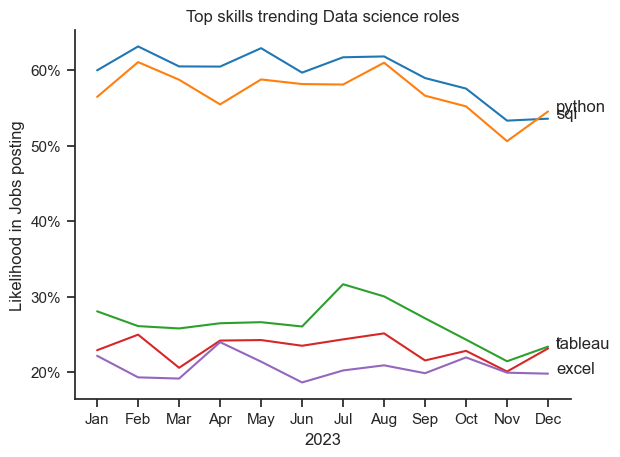

In [143]:
from matplotlib.ticker import PercentFormatter

df_plot = df_Ind_US_perc.iloc[:, :5]

sns.lineplot(data = df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top skills trending Data science roles')
plt.xlabel('2023')
plt.ylabel('Likelihood in Jobs posting')
plt.legend().remove()

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i] ) 

plt.show()